### Exercise 9.3: Parallel plate capacitor

Consider the following simple model of an electronic capacitor consisting of two flat metal plates enclosed in a square metal box:

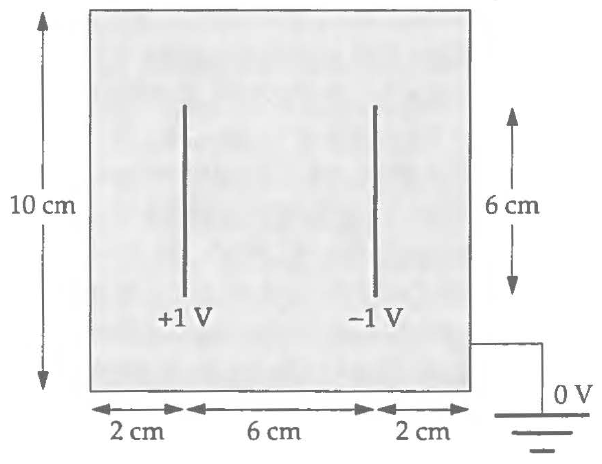

For simplicity, model the system in two dimensions. Write a program to calculate the electronic potential in the box on a grid of 100 x 100 points, where the walls of the box are at voltage zero and the two plates are at voltages $\pm 1$V as shown. Have the program calculate the value of the potential at each grid point to a precision of $10^{-6}$V and then make a density plot of the results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Initializing the values
M = 100
precision = 1e-6

# Boundary of the metal box
boundary = [0, 0, 0, 0] # locations: t, b, l, r
xdim = [0, 10]
ydim = [0, 10]

In [3]:
# Array of potentials

xvals = np.linspace(xdim[0], xdim[1], M+1)
yvals = np.linspace(ydim[0], ydim[1], M+1)
X, Y = np.meshgrid(xvals, yvals)

phi = np.zeros([M+1, M+1], float)
phi[0,:], phi[-1,:], phi[:,0], phi[:,-1] = boundary[0], boundary[1], boundary[2], boundary[3] 
phiprime = np.empty([M+1, M+1], float)

In [4]:
n = M // 5
delta = 1.0
iterations = 0
max_iterations = 100000

# Iterations for faster code runtime
while delta > precision:
    if iterations > max_iterations:
        break
    phiprime[1:-1, 1:-1] = (phi[:-2, 1:-1] + phi[2:, 1:-1] +  phi[1:-1, :-2] + phi[1:-1, 2:]) / 4
    phiprime[n, n:-n], phiprime[-n, n:-n] = 1, -1
    delta = np.max(abs(phi - phiprime))
    phi, phiprime = phiprime, phi
    iterations =+ 1

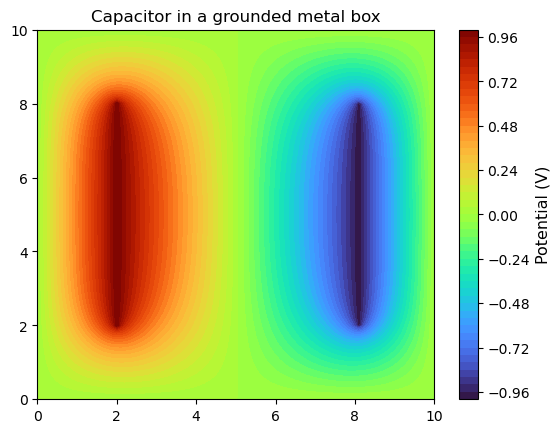

In [5]:
plt.title("Capacitor in a grounded metal box")
plt.contourf(Y, X, phiprime, 50, cmap = "turbo")
potential = plt.colorbar()
potential.set_label("Potential (V)", size = 11.5)

plt.savefig("capacitor.png", dpi = 300)